In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import where as IF

1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims = pd.read_csv("claims.csv")
demo = pd.read_csv("cust_demographics.csv")
demo.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [3]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [4]:
comb_df = pd.merge(right = claims,
                   left = demo, 
                   right_on = "customer_id", 
                   left_on = "CUST_ID",
                   how = "outer"
                  )
comb_df.drop(columns = ["customer_id"], inplace = True)
comb_df.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [5]:
comb_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.
3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [8]:
comb_df["DateOfBirth"] = pd.to_datetime(comb_df.DateOfBirth, format = "%d-%b-%y")
comb_df.loc[(comb_df.DateOfBirth.dt.year > 2020),"DateOfBirth"]=comb_df[comb_df.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))
comb_df["claim_date"] = pd.to_datetime(comb_df.claim_date, format = "%m/%d/%Y")
comb_df["Contact"] = pd.to_numeric(comb_df.Contact.str.replace("-",""),downcast='float')
comb_df["claim_amount"] = pd.to_numeric(comb_df.claim_amount.str.replace("$",""),downcast='float')
comb_df.head(2)

AttributeError: Can only use .str accessor with string values!

4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [9]:

comb_df["flag"] = IF(comb_df.police_report == "No", 0 ,
                    IF(comb_df.police_report == "Yes", 1, np.nan))
comb_df.drop(columns = ["police_report"], inplace = True)

AttributeError: 'DataFrame' object has no attribute 'police_report'

5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [10]:
comb_df = comb_df.groupby('CUST_ID').first().reset_index(drop = True)

6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [11]:
comb_df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,NaN
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,0.0


In [12]:
comb_df["incident_cause"].isna().sum()

7

In [13]:
cat_col = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","flag"]
con_col = ["claim_amount"]

In [14]:
for col in cat_col:
    comb_df[col] = comb_df[col].fillna(comb_df[col].mode()[0])
comb_df[con_col] = comb_df[con_col].fillna(comb_df[con_col].mean())
comb_df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0


In [15]:
# comb_df["incident_cause"].fillna(0, inplace =True)
comb_df["State"].isna().sum()


0

7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
        Children < 18
        Youth 18-30
        Adult 30-60
        Senior > 60

In [16]:
comb_df["Age"] = round((comb_df.claim_date - comb_df.DateOfBirth).apply(lambda x: x.days)/365.25, 2)

In [17]:
comb_df["Age_grp"] = IF(comb_df.Age < 18, "Children",
                        IF(comb_df.Age < 30, "Youth",
                         IF(comb_df.Age < 60, "Adult",
                          IF(comb_df.Age < 100, "Senior", "NaN"
                           
                          )
                         )
                        )
                       )
comb_df["Age_grp"] = comb_df["Age_grp"].fillna(comb_df["Age_grp"].mode())
comb_df.groupby(by = "Age_grp").count()
# comb_df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
Age_grp,,,,,,,,,,,,,,,
Adult,744,744,744,744,744,744,744,744,744,744,744,736,744,744,744
Children,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
NaN,7,7,7,7,7,0,7,0,7,7,7,0,7,7,0
Youth,326,326,326,326,326,326,326,326,326,326,326,324,326,326,326


What is the average amount claimed by the customers from various segments?

In [18]:
comb_df.groupby(by = "Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12755.710938
Platinum,12370.138672
Silver,12271.163086


What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [19]:
comb_df.loc[comb_df.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_")

incident_cause
total_Crime                  724462.5
total_Driver error          3264286.0
total_Natural causes        1312706.0
total_Other causes          3725038.5
total_Other driver error    3318806.5
Name: claim_amount, dtype: float32

10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [20]:
comb_df.loc[(comb_df.incident_cause.str.lower().str.contains("driver") 
             & ((comb_df.State == "TX") | (comb_df.State == "DE") | (comb_df.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [21]:
f1 = comb_df.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()
f1.head()

,gender,Segment,claim_amount
0,Female,Gold,2122234.0
1,Female,Platinum,2381974.0
2,Female,Silver,1935970.0
3,Male,Gold,2622890.5
4,Male,Platinum,2120756.5


In [22]:
res = f1.pivot(index = "Segment", columns = "gender", values = "claim_amount")
res

gender,Female,Male
Segment,,
Gold,2122234.0,2622890.5
Platinum,2381974.0,2120756.5
Silver,1935970.0,2346666.0


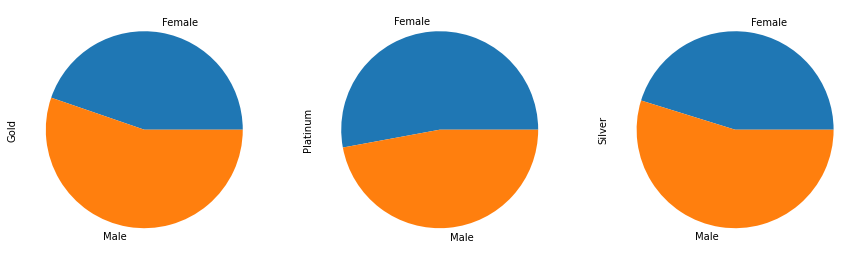

In [23]:
res.T.plot(kind = "pie", subplots = True, legend = False, figsize = (15,8))
plt.show()

12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [24]:
f2 = comb_df.loc[(comb_df.incident_cause.str.lower().str.contains("driver"))].groupby(by = "gender")[["gender"]].count().add_prefix("CountOf_").reset_index()
f2

,gender,CountOf_gender
0,Female,221
1,Male,280


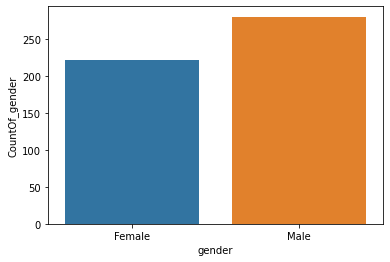

In [25]:
sns.barplot(x = "gender", y = "CountOf_gender", data = f2 )
plt.show()

13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [26]:
comb_df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0,39.88,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,45.29,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,29.22,Youth
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,46.59,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,37.96,Adult


In [27]:

comb_df.groupby(by = "Age_grp")[["fraudulent"]].count()

,fraudulent
Age_grp,
Adult,744
Children,8
NaN,7
Youth,326


In [28]:
comb_df[(comb_df.Age_grp == np.nan)]

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp


In [29]:
val = comb_df['Age_grp'].mode()[0]
print(val)
comb_df.loc[:,"Age_grp"] = comb_df.loc[:,'Age_grp'].fillna(value = val)


Adult


In [30]:
comb_df[(comb_df.Age_grp == "nan")]

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp


In [31]:
comb_df['Age_grp'].mode()[0]

'Adult'